In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2024-01-17 14:04:02.140364: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
mnist = keras.datasets.fashion_mnist

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [6]:
print(test_images.shape, test_labels.shape)

(10000, 28, 28) (10000,)


In [7]:
type(train_images)

numpy.ndarray

In [8]:
# train set의 각 class 별 image 수 확인
unique, counts = np.unique(train_labels, axis = 0, return_counts = True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [9]:
unique, counts = np.unique(test_labels, axis = -1, return_counts = True)
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

### Data 시각화

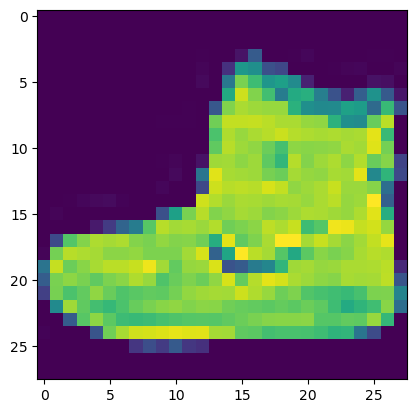

In [10]:
plt.imshow(train_images[0])
plt.show()

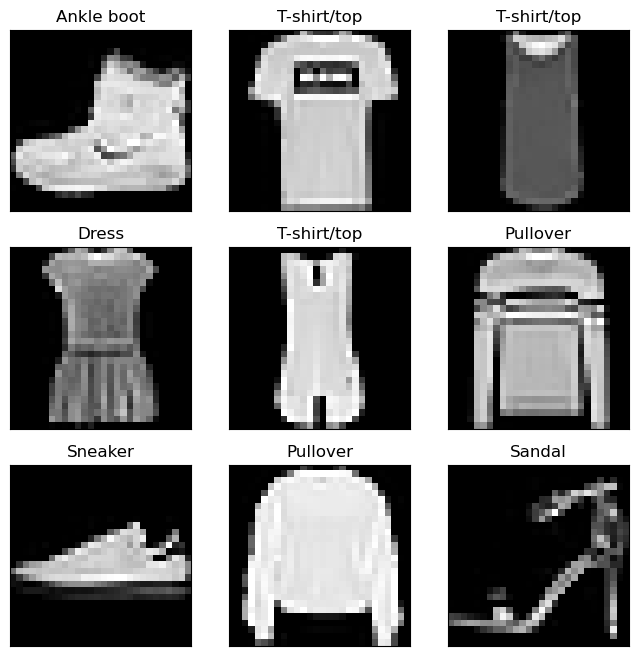

In [11]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3,3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = 'gray')
    plt.title(class_names[train_labels[i]])

plt.show()

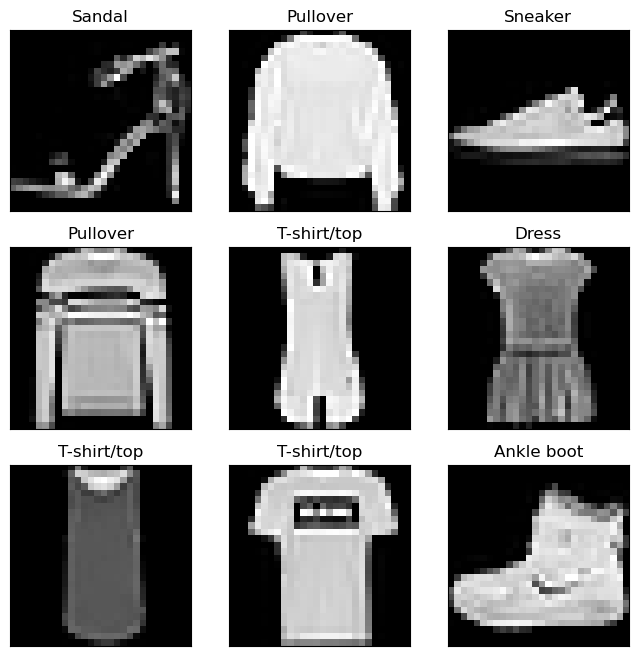

In [14]:
plt.figure(figsize=(8, 8))
for i in range(8, -1, -1):  # i를 8부터 0까지 감소시키도록 변경
    plt.subplot(3, 3, 9 - i)  # 그림을 나타내는 subplot의 위치를 9 - i로 변경
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
plt.show()

### Data 전처리

In [17]:
train_images[0]
a = train_images.astype(np.float32)/255.

In [18]:
a[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
train_labels[10]

0

In [23]:
# image를 0~1사이 값으로 만들기 위하여 255로 나누어 준다.
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

# one-hot encoding
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [27]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [26]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Data set 만들기

In [29]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(buffer_size = 100000).batch(64)

In [30]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)

Feature batch shape: (64, 28, 28)
Labels batch shape: (64, 10)


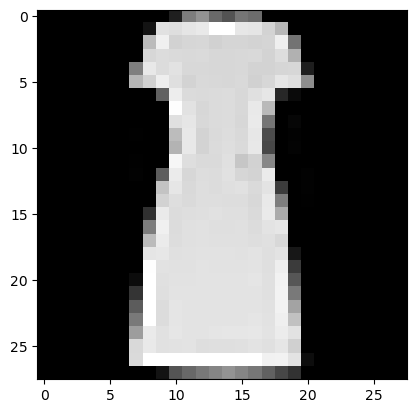

Lable: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [32]:
# Data set 을 통해 반복하기(Iterate)
# 이미지와 정딥(label)을 표시한다.
imgs, lbs = next(iter(train_dataset))
print(f"Feature batch shape: {imgs.shape}")
print(f"Labels batch shape: {lbs.shape}")

img = imgs[0]
lb = lbs[0]
plt.imshow(img, cmap = 'gray')
plt.show()
print(f"Lable: {lb}")

In [33]:
imgs

<tf.Tensor: shape=(64, 28, 28), dtype=float32, numpy=
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.  

### Custom data set 만들기

In [47]:
a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [48]:
ds_tensors = tf.data.Dataset.from_tensor_slices(a)
print(ds_tensors)

for i in ds_tensors:
    print(i.numpy())

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
0
1
2
3
4
5
6
7
8
9


In [49]:
ds_tensors = ds_tensors.map(tf.square).shuffle(10).batch(2)

In [50]:
ds_tensors

<_BatchDataset element_spec=TensorSpec(shape=(None,), dtype=tf.int64, name=None)>

In [51]:
print(ds_tensors)

<_BatchDataset element_spec=TensorSpec(shape=(None,), dtype=tf.int64, name=None)>


In [52]:
for i in ds_tensors:
    print(i.numpy())

[64  4]
[ 9 36]
[25  0]
[ 1 81]
[49 16]


In [54]:
for _ in range(3):
    for i in ds_tensors:
        print(i)
    print('='*50)

tf.Tensor([49  9], shape=(2,), dtype=int64)
tf.Tensor([81  1], shape=(2,), dtype=int64)
tf.Tensor([36 64], shape=(2,), dtype=int64)
tf.Tensor([25 16], shape=(2,), dtype=int64)
tf.Tensor([0 4], shape=(2,), dtype=int64)
tf.Tensor([25 81], shape=(2,), dtype=int64)
tf.Tensor([16  1], shape=(2,), dtype=int64)
tf.Tensor([49  4], shape=(2,), dtype=int64)
tf.Tensor([0 9], shape=(2,), dtype=int64)
tf.Tensor([64 36], shape=(2,), dtype=int64)
tf.Tensor([ 9 64], shape=(2,), dtype=int64)
tf.Tensor([ 1 81], shape=(2,), dtype=int64)
tf.Tensor([36 49], shape=(2,), dtype=int64)
tf.Tensor([25  0], shape=(2,), dtype=int64)
tf.Tensor([16  4], shape=(2,), dtype=int64)
